# HOUSE RATING, Kaggle

## Gonzalo Romero Navarro

es.linkedin.com/in/gromeronavarro

### The first appproach that will be done for this project is to train a model with the raw data.
### After the first approcach, we will have a value to improve, and all the feature engineering will be done in order to improve the metric iteratively. 

#### Load the data and take a look

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv', index_col=0)

In [3]:
train_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.tail(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


#### See the label: Sales Price

In [5]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


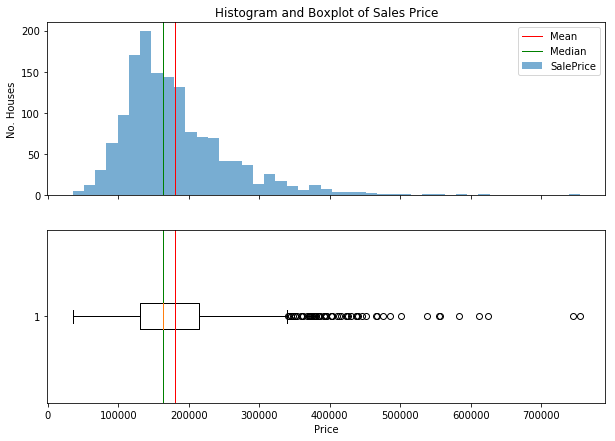

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(10,7), sharex=True)

ax[0].hist(train_data['SalePrice'], bins=45, alpha=0.6)
ax[0].axvline(train_data['SalePrice'].mean(), color='r', label="Mean", linewidth=1)
ax[0].axvline(train_data['SalePrice'].median(), color='g', label='Median', linewidth=1)
ax[0].set_title("Histogram and Boxplot of Sales Price")
ax[0].set_ylabel("No. Houses")
ax[0].legend()

ax[1].boxplot(train_data['SalePrice'], vert=False);
ax[1].set_xlabel("Price", )
ax[1].axvline(train_data['SalePrice'].mean(), color='r', label="Mean", linewidth=1)
ax[1].axvline(train_data['SalePrice'].median(), color='g', label='Median', linewidth=1);

print(train_data['SalePrice'].describe())

#### Correlation with numeric variables

In [8]:
num_features = [
 'LotFrontage'
 ,'LotArea'
 ,'BsmtFinSF1'
 ,'BsmtFinSF2'
 ,'BsmtUnfSF'
 ,'TotalBsmtSF'
 ,'1stFlrSF'
 ,'2ndFlrSF'
 ,'LowQualFinSF'
 ,'GrLivArea'
 ,'GarageArea'
 ,'WoodDeckSF'
 ,'OpenPorchSF'
 ,'EnclosedPorch'
 ,'3SsnPorch'
 ,'ScreenPorch'
 ,'PoolArea'
 ,'MiscVal'
]

In [9]:
num_features.sort()
num_features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'EnclosedPorch',
 'GarageArea',
 'GrLivArea',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'ScreenPorch',
 'TotalBsmtSF',
 'WoodDeckSF']

In [10]:
a = int(len(num_features)/3)
a

6

In [47]:
import math
def plot_cont_features(df, features_list, target_column):
    a = len(features_list)
    b = math.ceil(a/3)

    fig, ax = plt.subplots(b, 3, figsize=(35,50))
    n=0
    for r in range(b):
        for c in range(3):
            feature = features_list[n]
            ax[r, c].scatter(df[feature], df[target_column], alpha=0.4)
            ax[r, c].set_title(feature, fontsize=20)
            n += 1
    ;

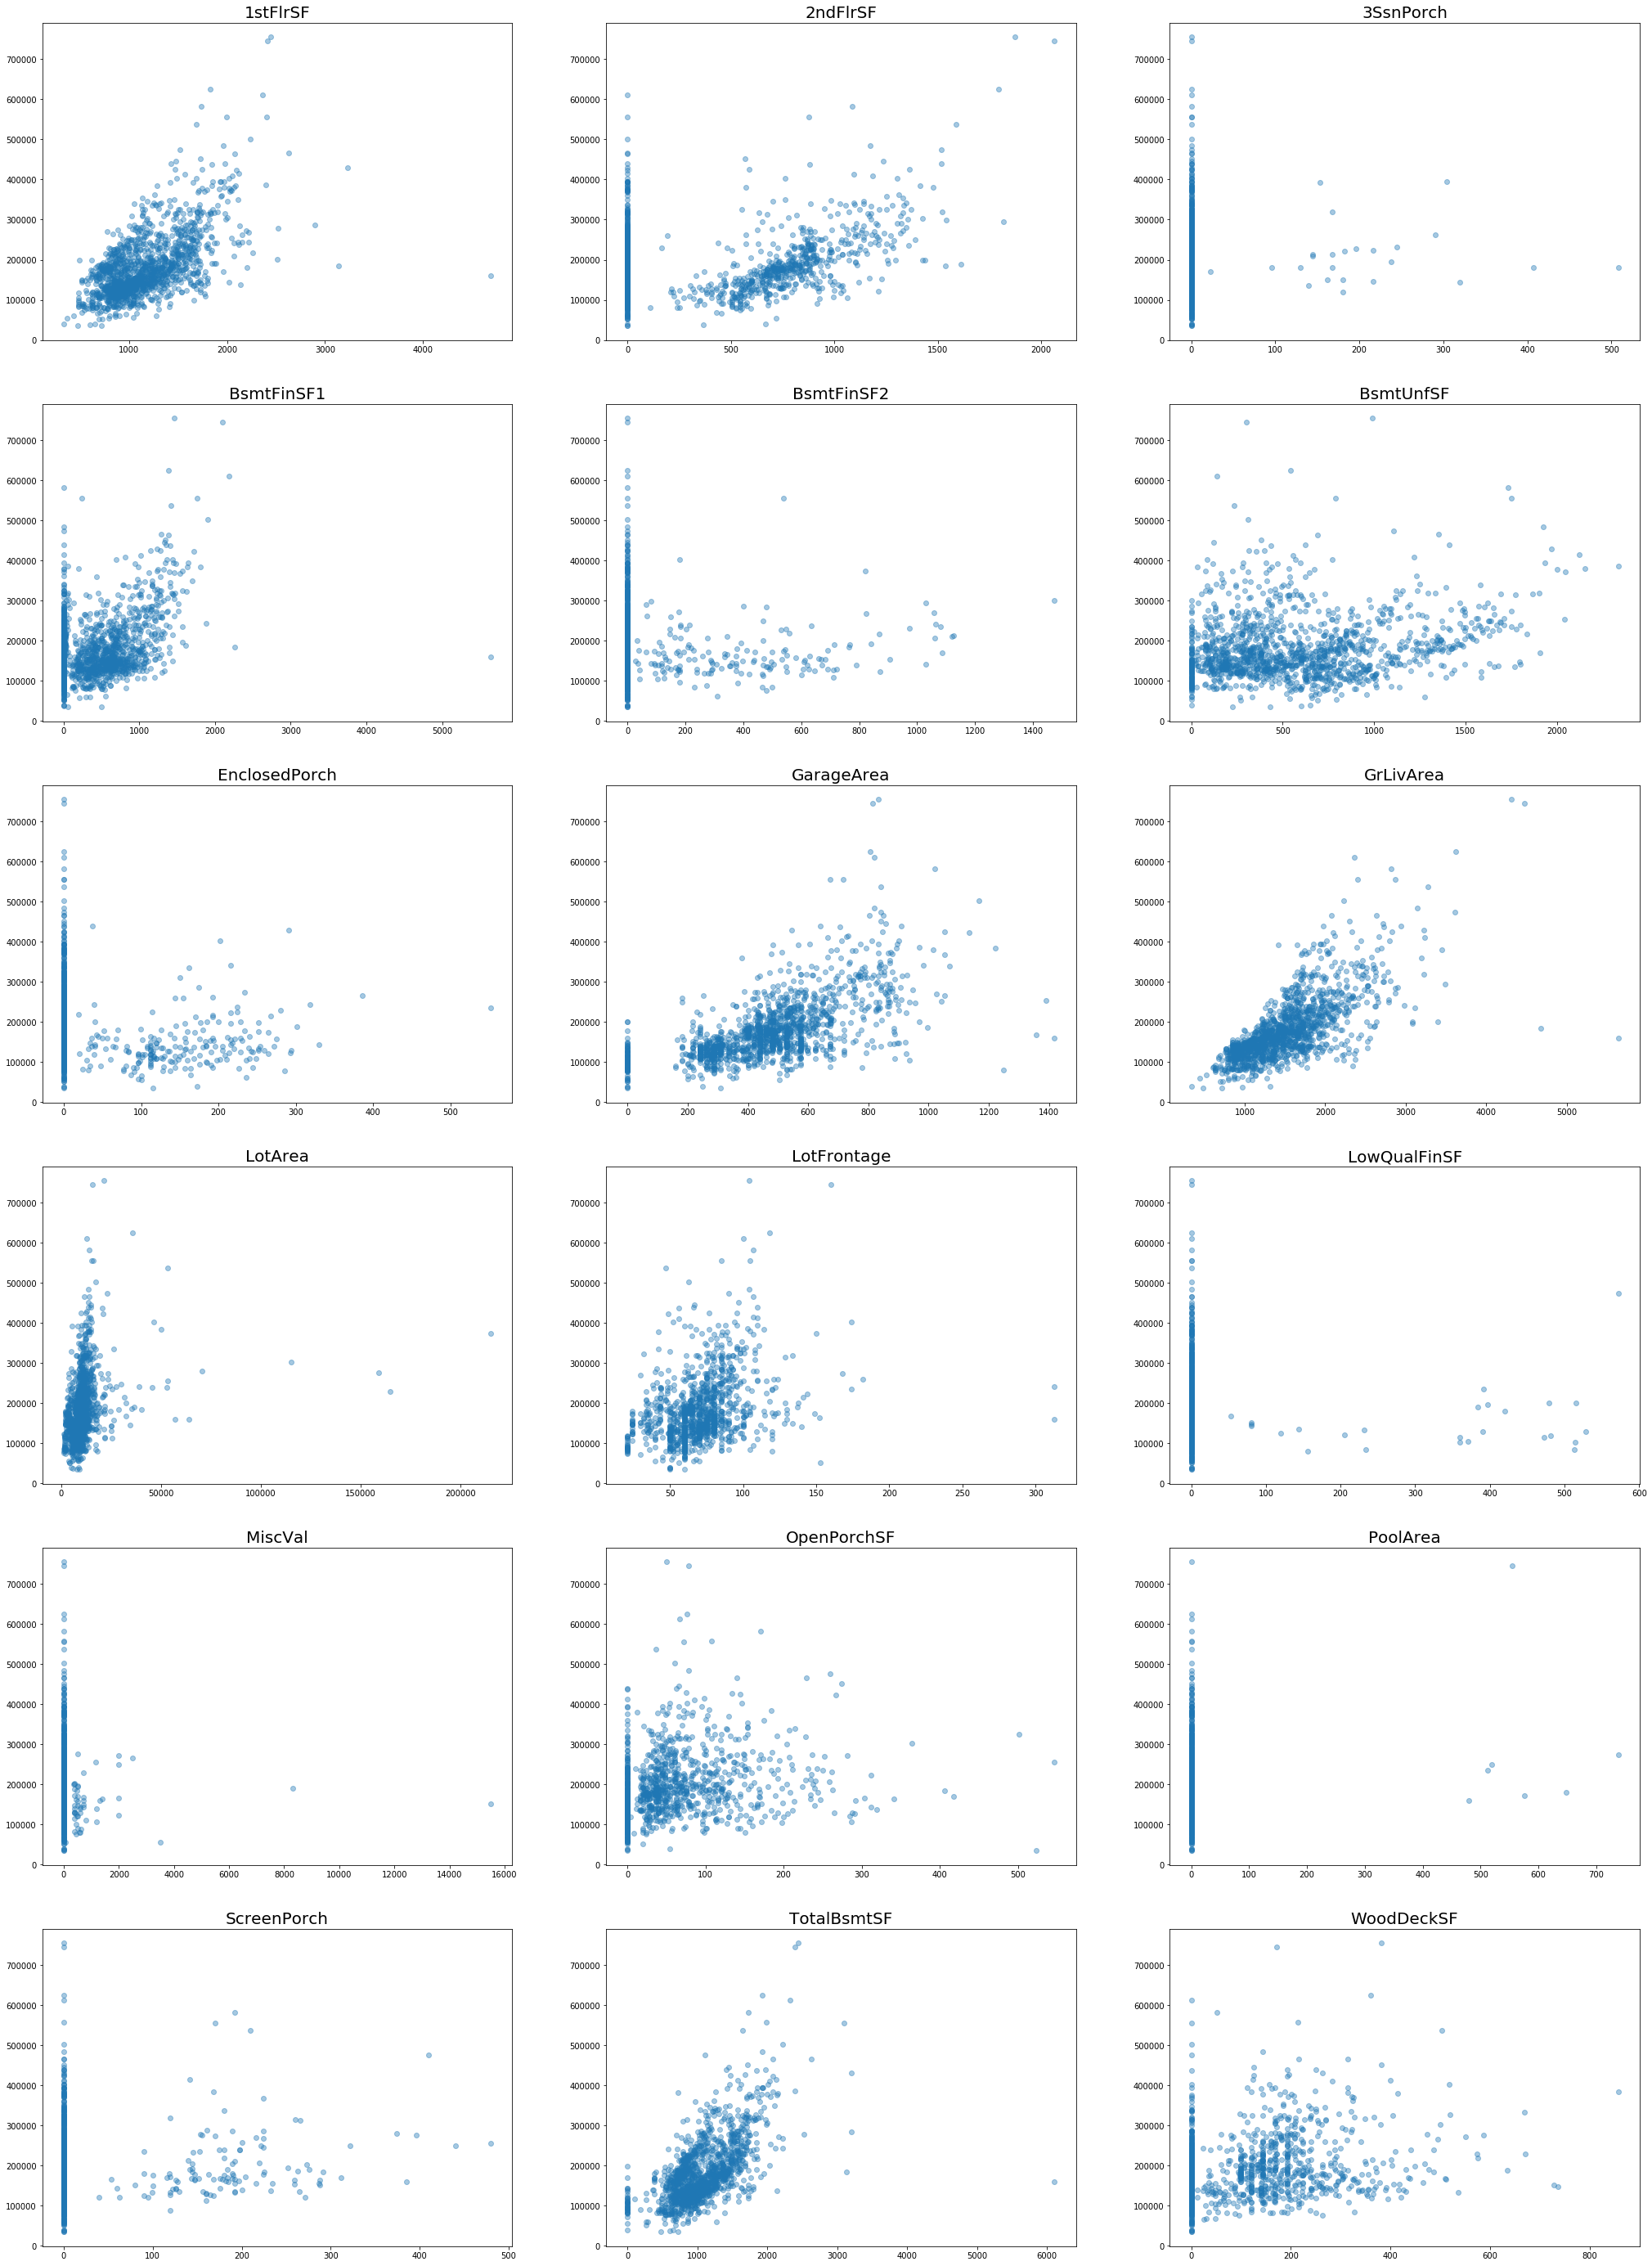

In [48]:
plot_cont_features(train_data, num_features, 'SalePrice')

In [12]:
corr_num = train_data[num_features + ['SalePrice']].corr()['SalePrice'].sort_values()
corr_num

EnclosedPorch   -0.128578
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
PoolArea         0.092404
ScreenPorch      0.111447
BsmtUnfSF        0.214479
LotArea          0.263843
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GrLivArea        0.708624
SalePrice        1.000000
Name: SalePrice, dtype: float64

#### Let's see the correlations more than 0.4 or less than -0.4 bettter

In [13]:
corr_num_imp = corr_num[abs(corr_num) > 0.4]
corr_num_imp = corr_num_imp[:-1]
corr_num_imp

1stFlrSF       0.605852
TotalBsmtSF    0.613581
GarageArea     0.623431
GrLivArea      0.708624
Name: SalePrice, dtype: float64

#### Correlation with discreet variables

In [14]:
num_features_dis = [
 'MSSubClass'
 ,'OverallQual'
 ,'OverallCond'
 ,'BsmtFullBath'
 ,'BsmtHalfBath'
 ,'FullBath'
 ,'HalfBath'
 ,'BedroomAbvGr'
 ,'KitchenAbvGr'
 ,'TotRmsAbvGrd'
 ,'Fireplaces'
 ,'GarageCars'
 ,'MoSold'
]

In [15]:
len(num_features_dis)

13

In [64]:
def plot_disc_features(df, features_list, target_column):
    a = len(features_list)
    b = math.ceil(a/3)

    fig, ax = plt.subplots(b, 3, figsize=(35,50))
    n=0
    for r in range(b):
        for c in range(3):
            feature = features_list[n]
            data = train_data.groupby(feature)[target_column].apply(list).groupby(level=0).apply(list)
            ax[r, c].boxplot(data, vert=True, patch_artist=True, labels=data.index)
            ax[r, c].set_title(feature, fontsize=20)
            if a-1 == n:                
                break
            n += 1
    ;

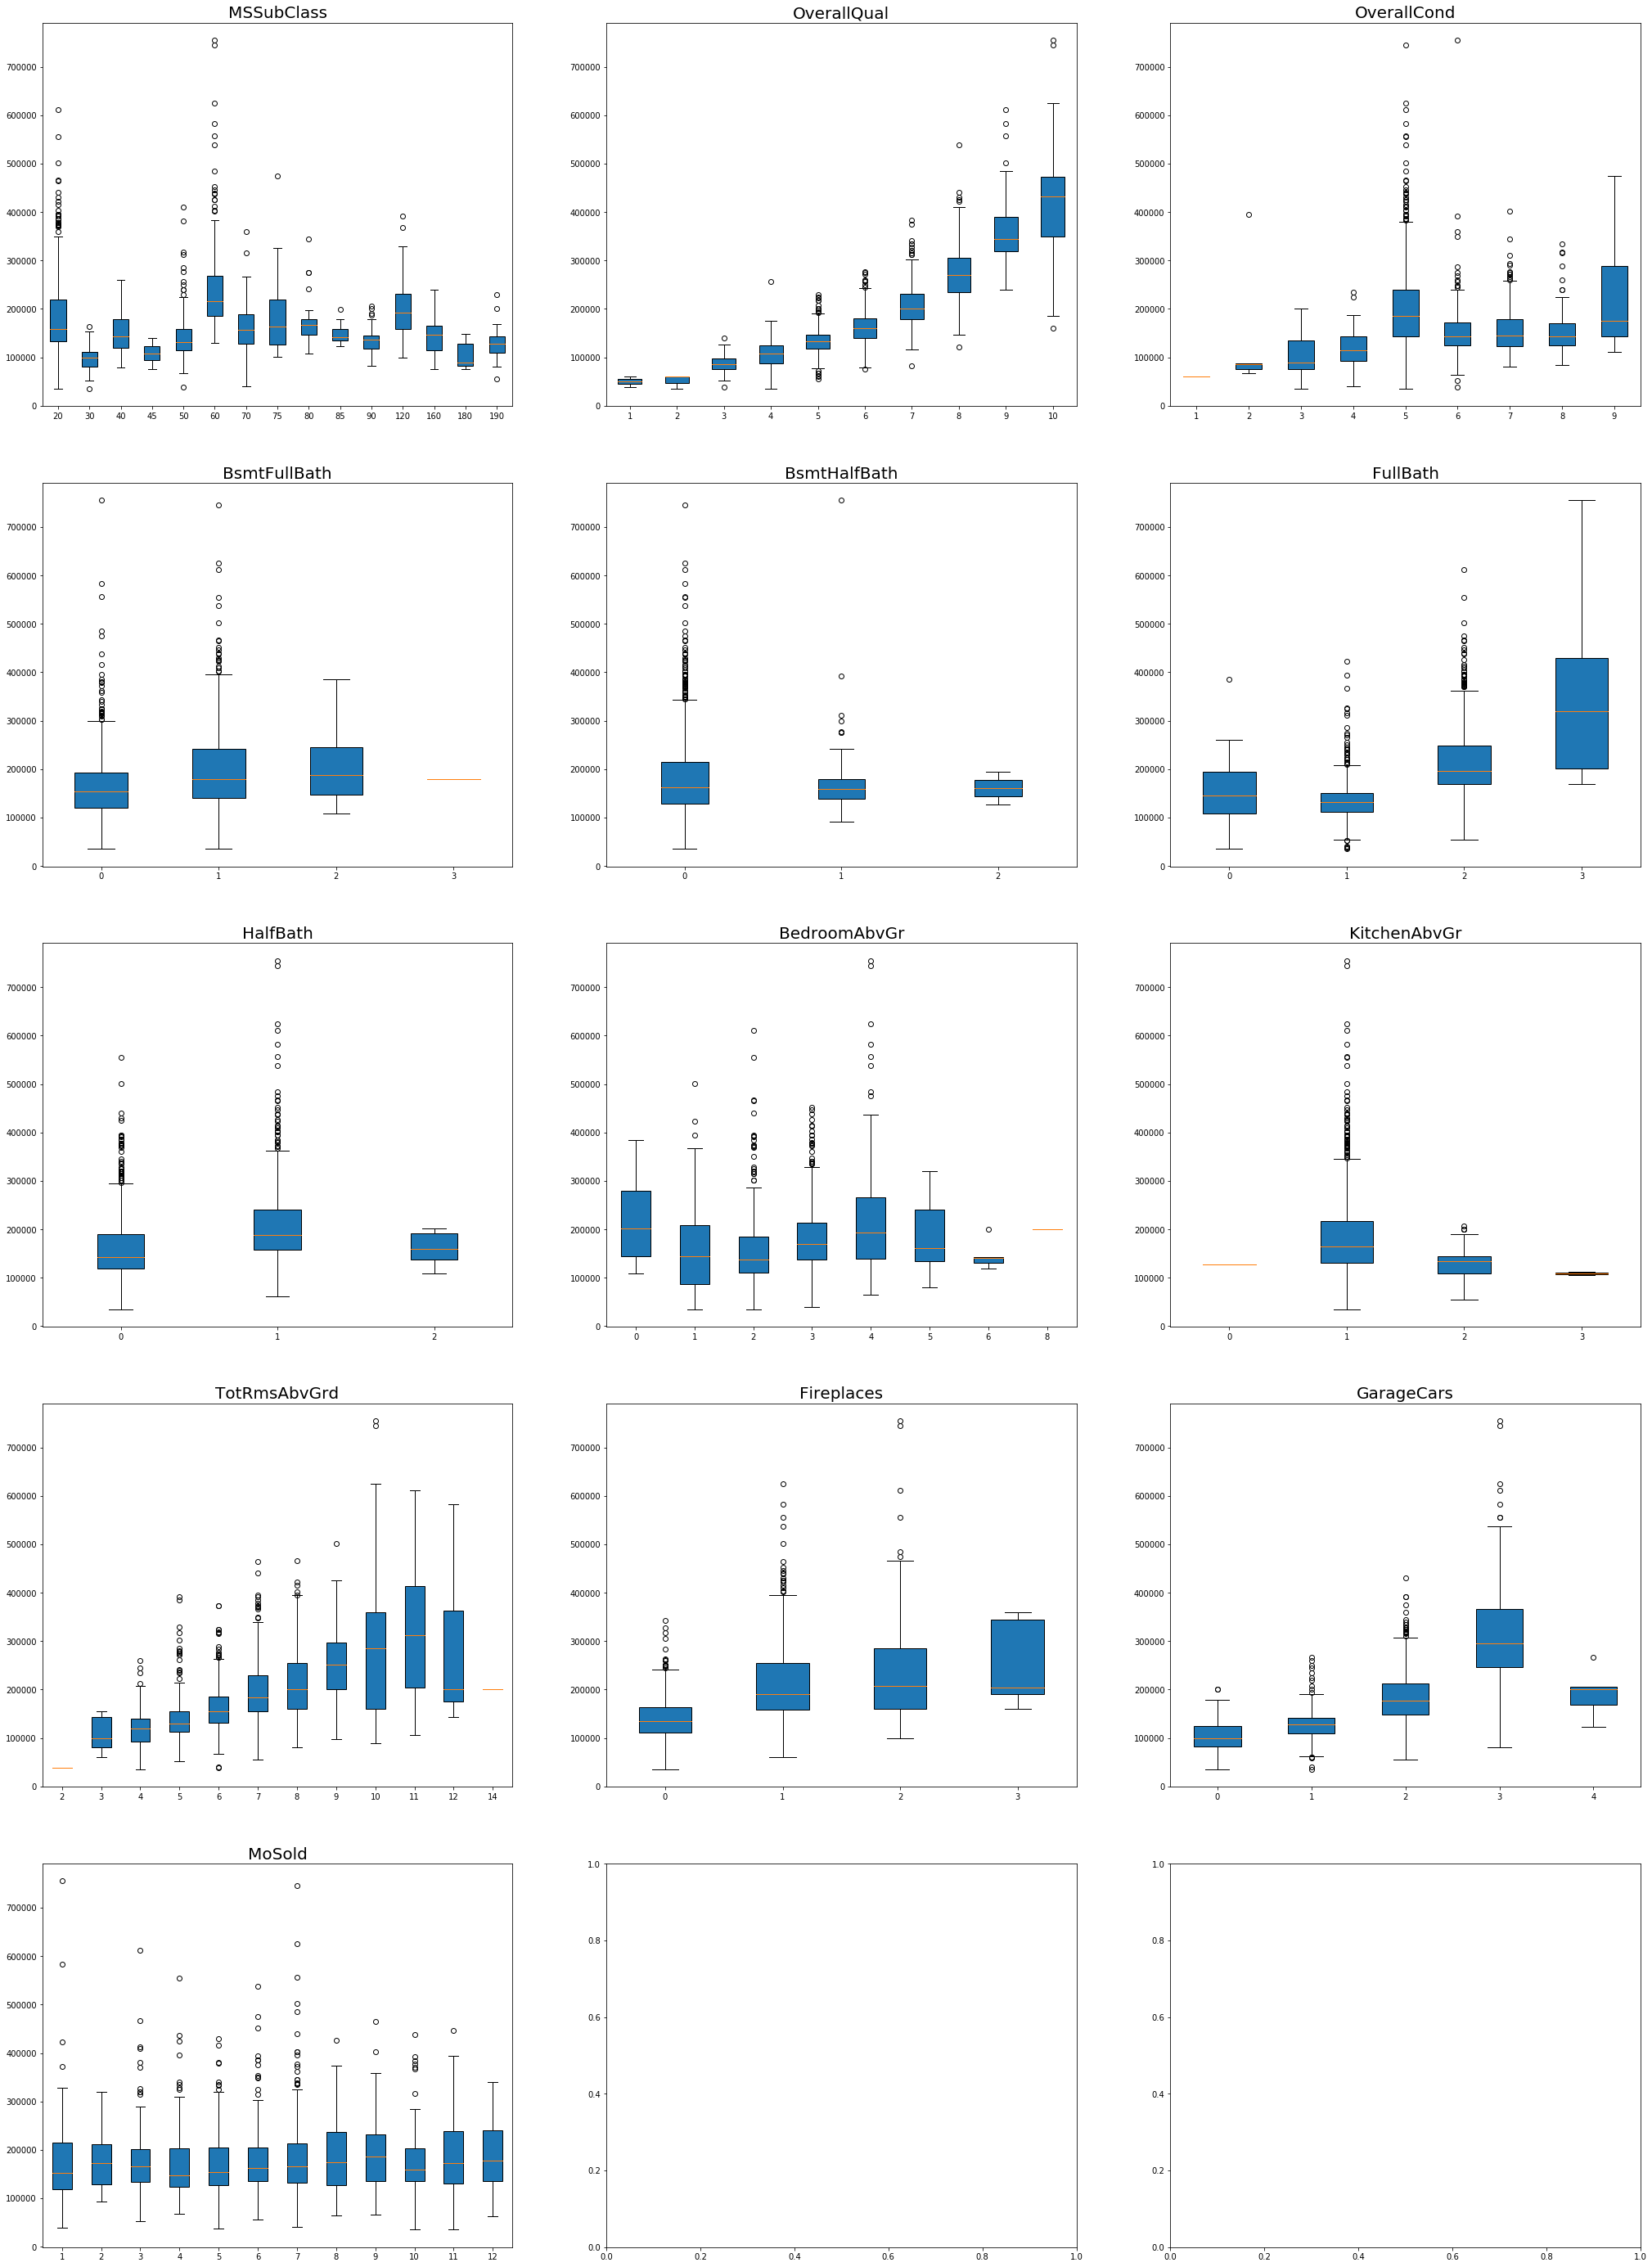

In [65]:
plot_disc_features(train_data, num_features_dis, 'SalePrice')

In [17]:
fig, ax = plt.subplots(5, 3, figsize=(35,50))

    for i, feature in enumerate(num_features_dis):
        data = train_data.groupby(feature)['SalePrice'].apply(list).groupby(level=0).apply(list)
        if i < 3:
            ax[0, i].boxplot(data, vert=True, patch_artist=True, labels=data.index)
            ax[0, i].set_title(feature, fontsize=20)
        if i < 6 and i >= 3:
            ax[1, i-3].boxplot(data, vert=True, patch_artist=True, labels=data.index)
            ax[1, i-3].set_title(feature, fontsize=20)
        if i < 9 and i >= 6:
            ax[2, i-6].boxplot(data, vert=True, patch_artist=True, labels=data.index)
            ax[2, i-6].set_title(feature, fontsize=20)
        if i < 12 and i >= 9:
            ax[3, i-9].boxplot(data, vert=True, patch_artist=True, labels=data.index)
            ax[3, i-9].set_title(feature, fontsize=20)
        if i < 15 and i >= 12:
            ax[4, i-12].boxplot(data, vert=True, patch_artist=True, labels=data.index)
            ax[4, i-12].set_title(feature, fontsize=20)
    ;

IndentationError: unexpected indent (<ipython-input-17-2fa49d87eb7e>, line 3)

In [18]:
corr_num_dis = train_data[num_features_dis + ['SalePrice']].corr()['SalePrice'].sort_values()
corr_num_dis

KitchenAbvGr   -0.135907
MSSubClass     -0.084284
OverallCond    -0.077856
BsmtHalfBath   -0.016844
MoSold          0.046432
BedroomAbvGr    0.168213
BsmtFullBath    0.227122
HalfBath        0.284108
Fireplaces      0.466929
TotRmsAbvGrd    0.533723
FullBath        0.560664
GarageCars      0.640409
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64

#### Let's see the correlations more than 0.4 or less than -0.4 bettter

In [19]:
corr_num_dis = corr_num_dis[:-1]
corr_num_dis = corr_num_dis[abs(corr_num_dis) > 0.4]
corr_num_dis

Fireplaces      0.466929
TotRmsAbvGrd    0.533723
FullBath        0.560664
GarageCars      0.640409
OverallQual     0.790982
Name: SalePrice, dtype: float64

#### Correlation with year variables

In [20]:
yr_features = [
 'YearBuilt'
 ,'YearRemodAdd'
 ,'GarageYrBlt'
 ,'YrSold'
]

In [66]:
def plot_year_features(df, features_list, target_column):
    a = len(features_list)

    fig, ax = plt.subplots(a, 1, figsize=(35,50))

    for i, feature in enumerate(features_list):
        data = df.groupby(feature)[target_column].apply(list).groupby(level=0).apply(list)
        ax[i].boxplot(data, vert=True, patch_artist=True, labels=data.index)
        ax[i].set_title(feature, fontsize=40)
        ax[i].set_xlabel('year', fontsize=20)
        ax[i].set_ylabel(target_column, fontsize=20)
        ax[i].tick_params(labelrotation=85, labelsize = 15)
    ;

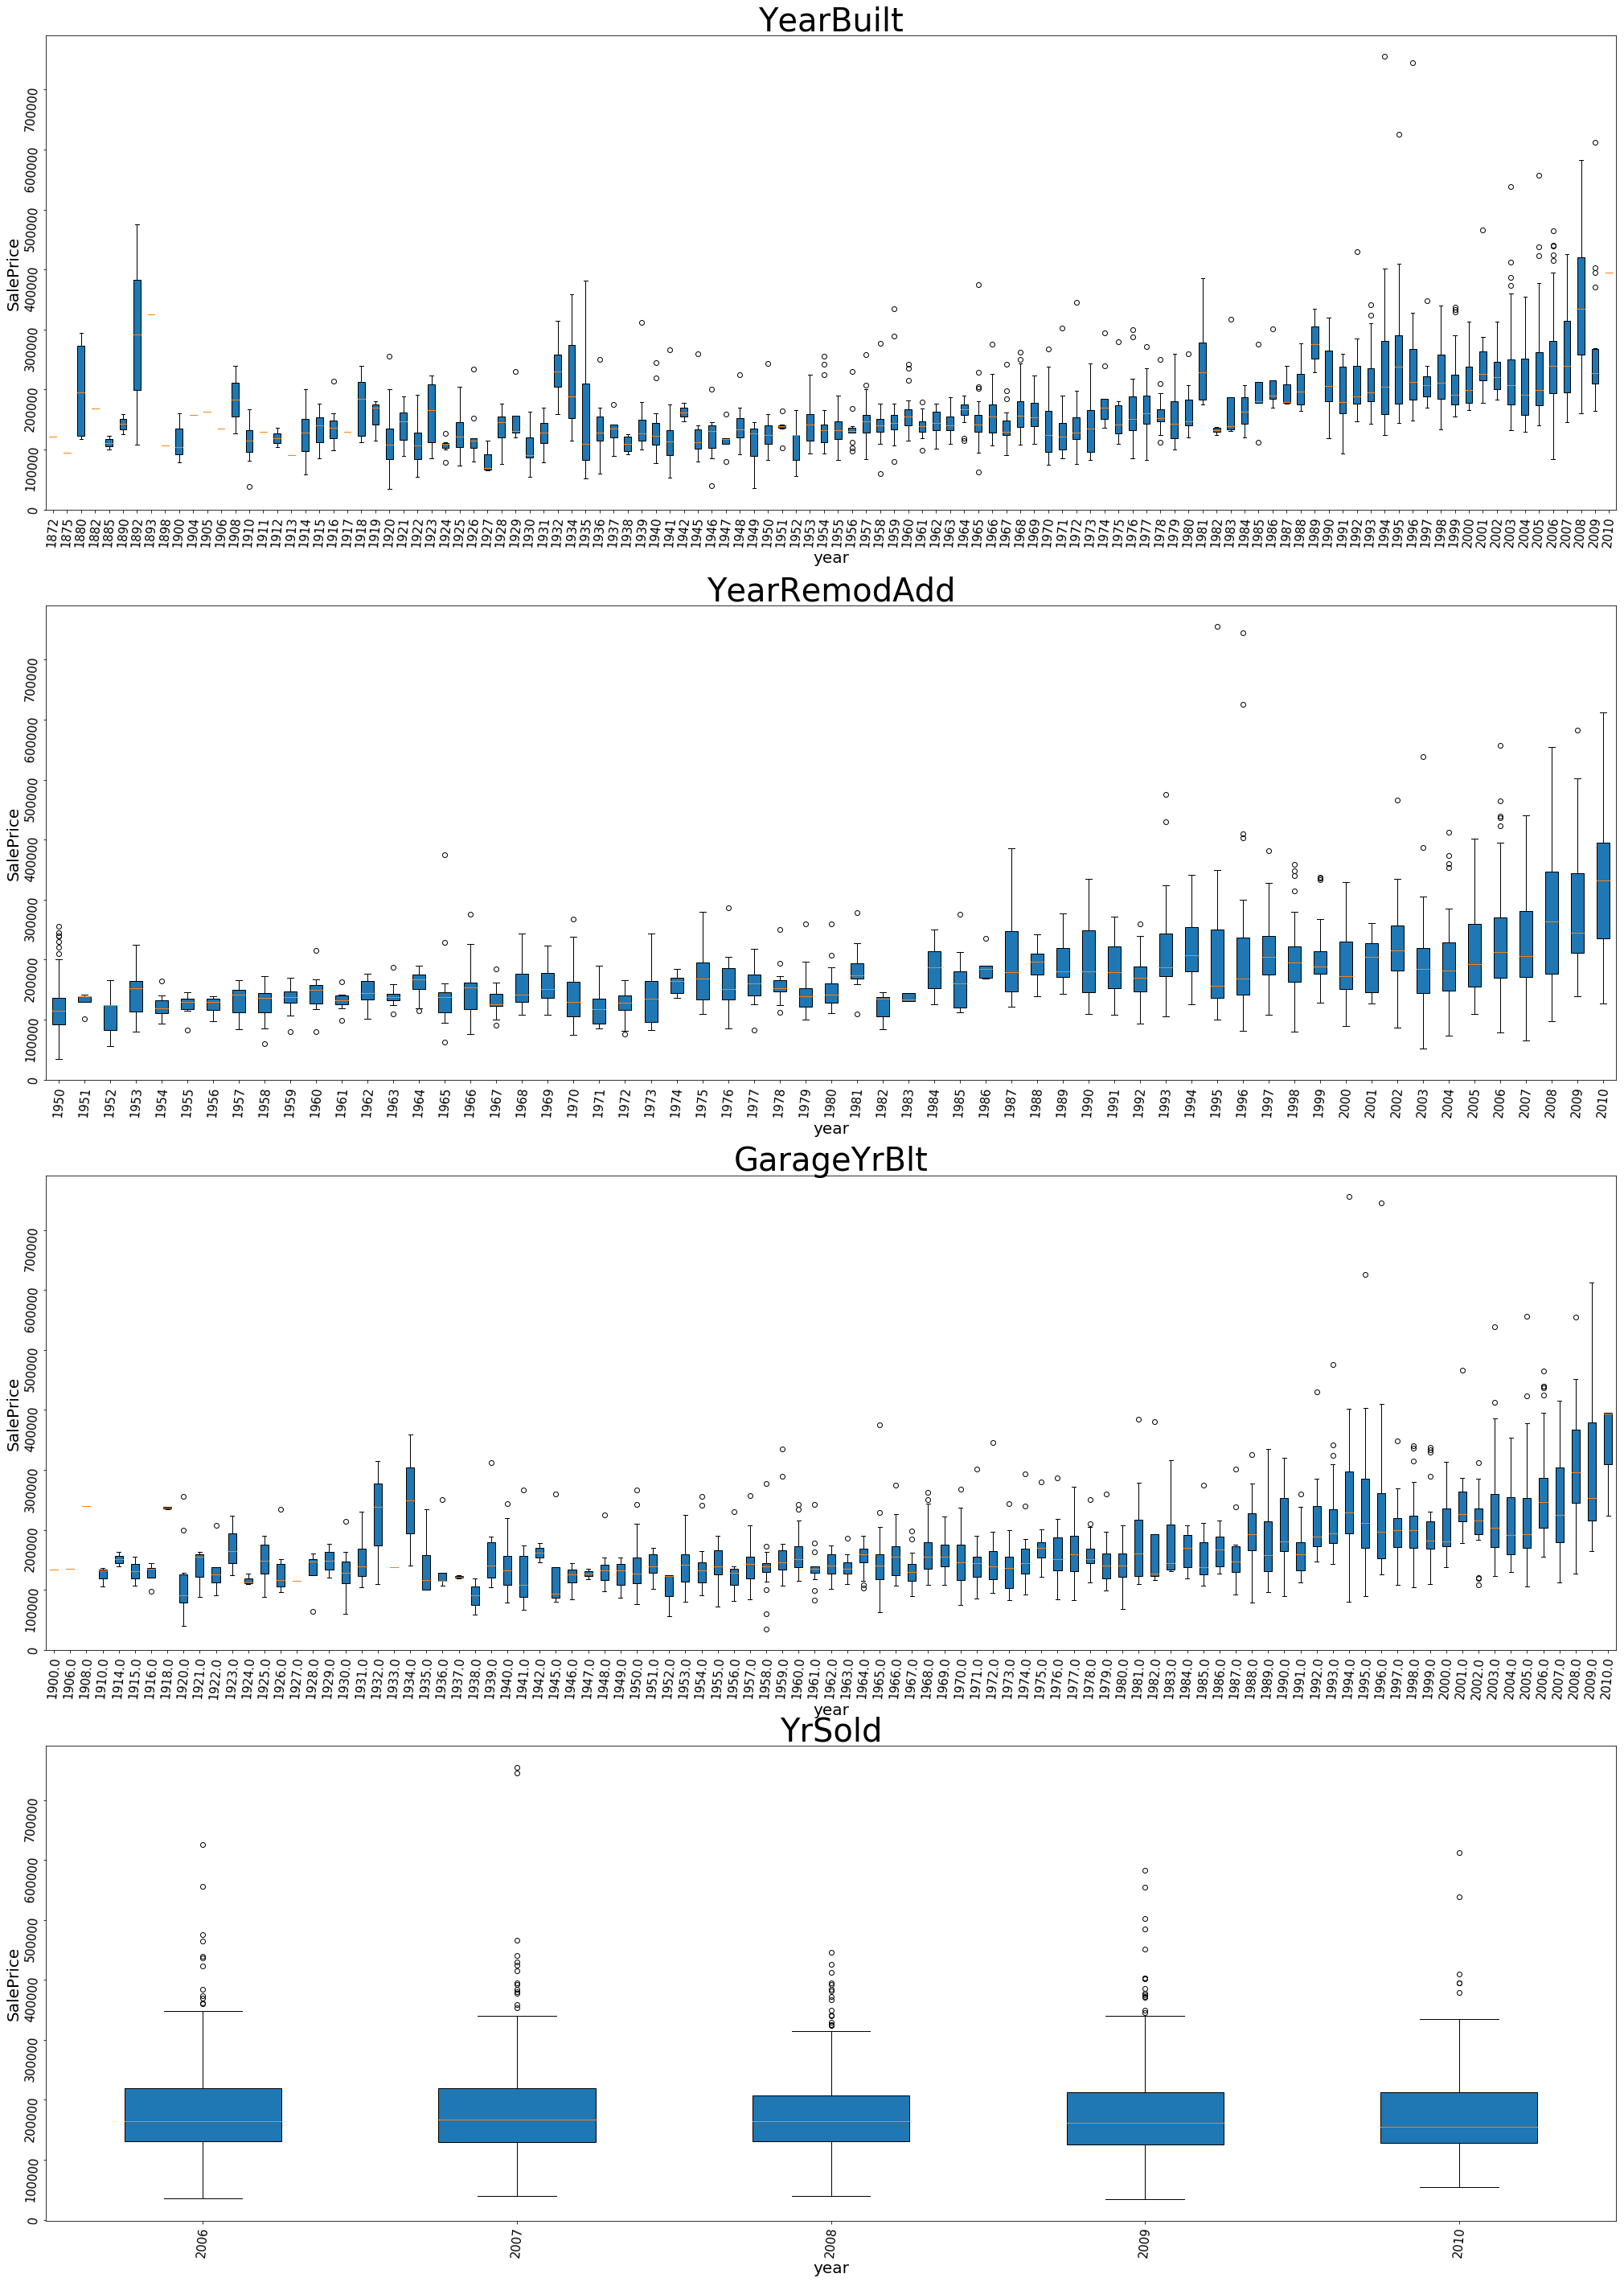

In [67]:
plot_year_features(train_data,yr_features,'SalePrice')

''

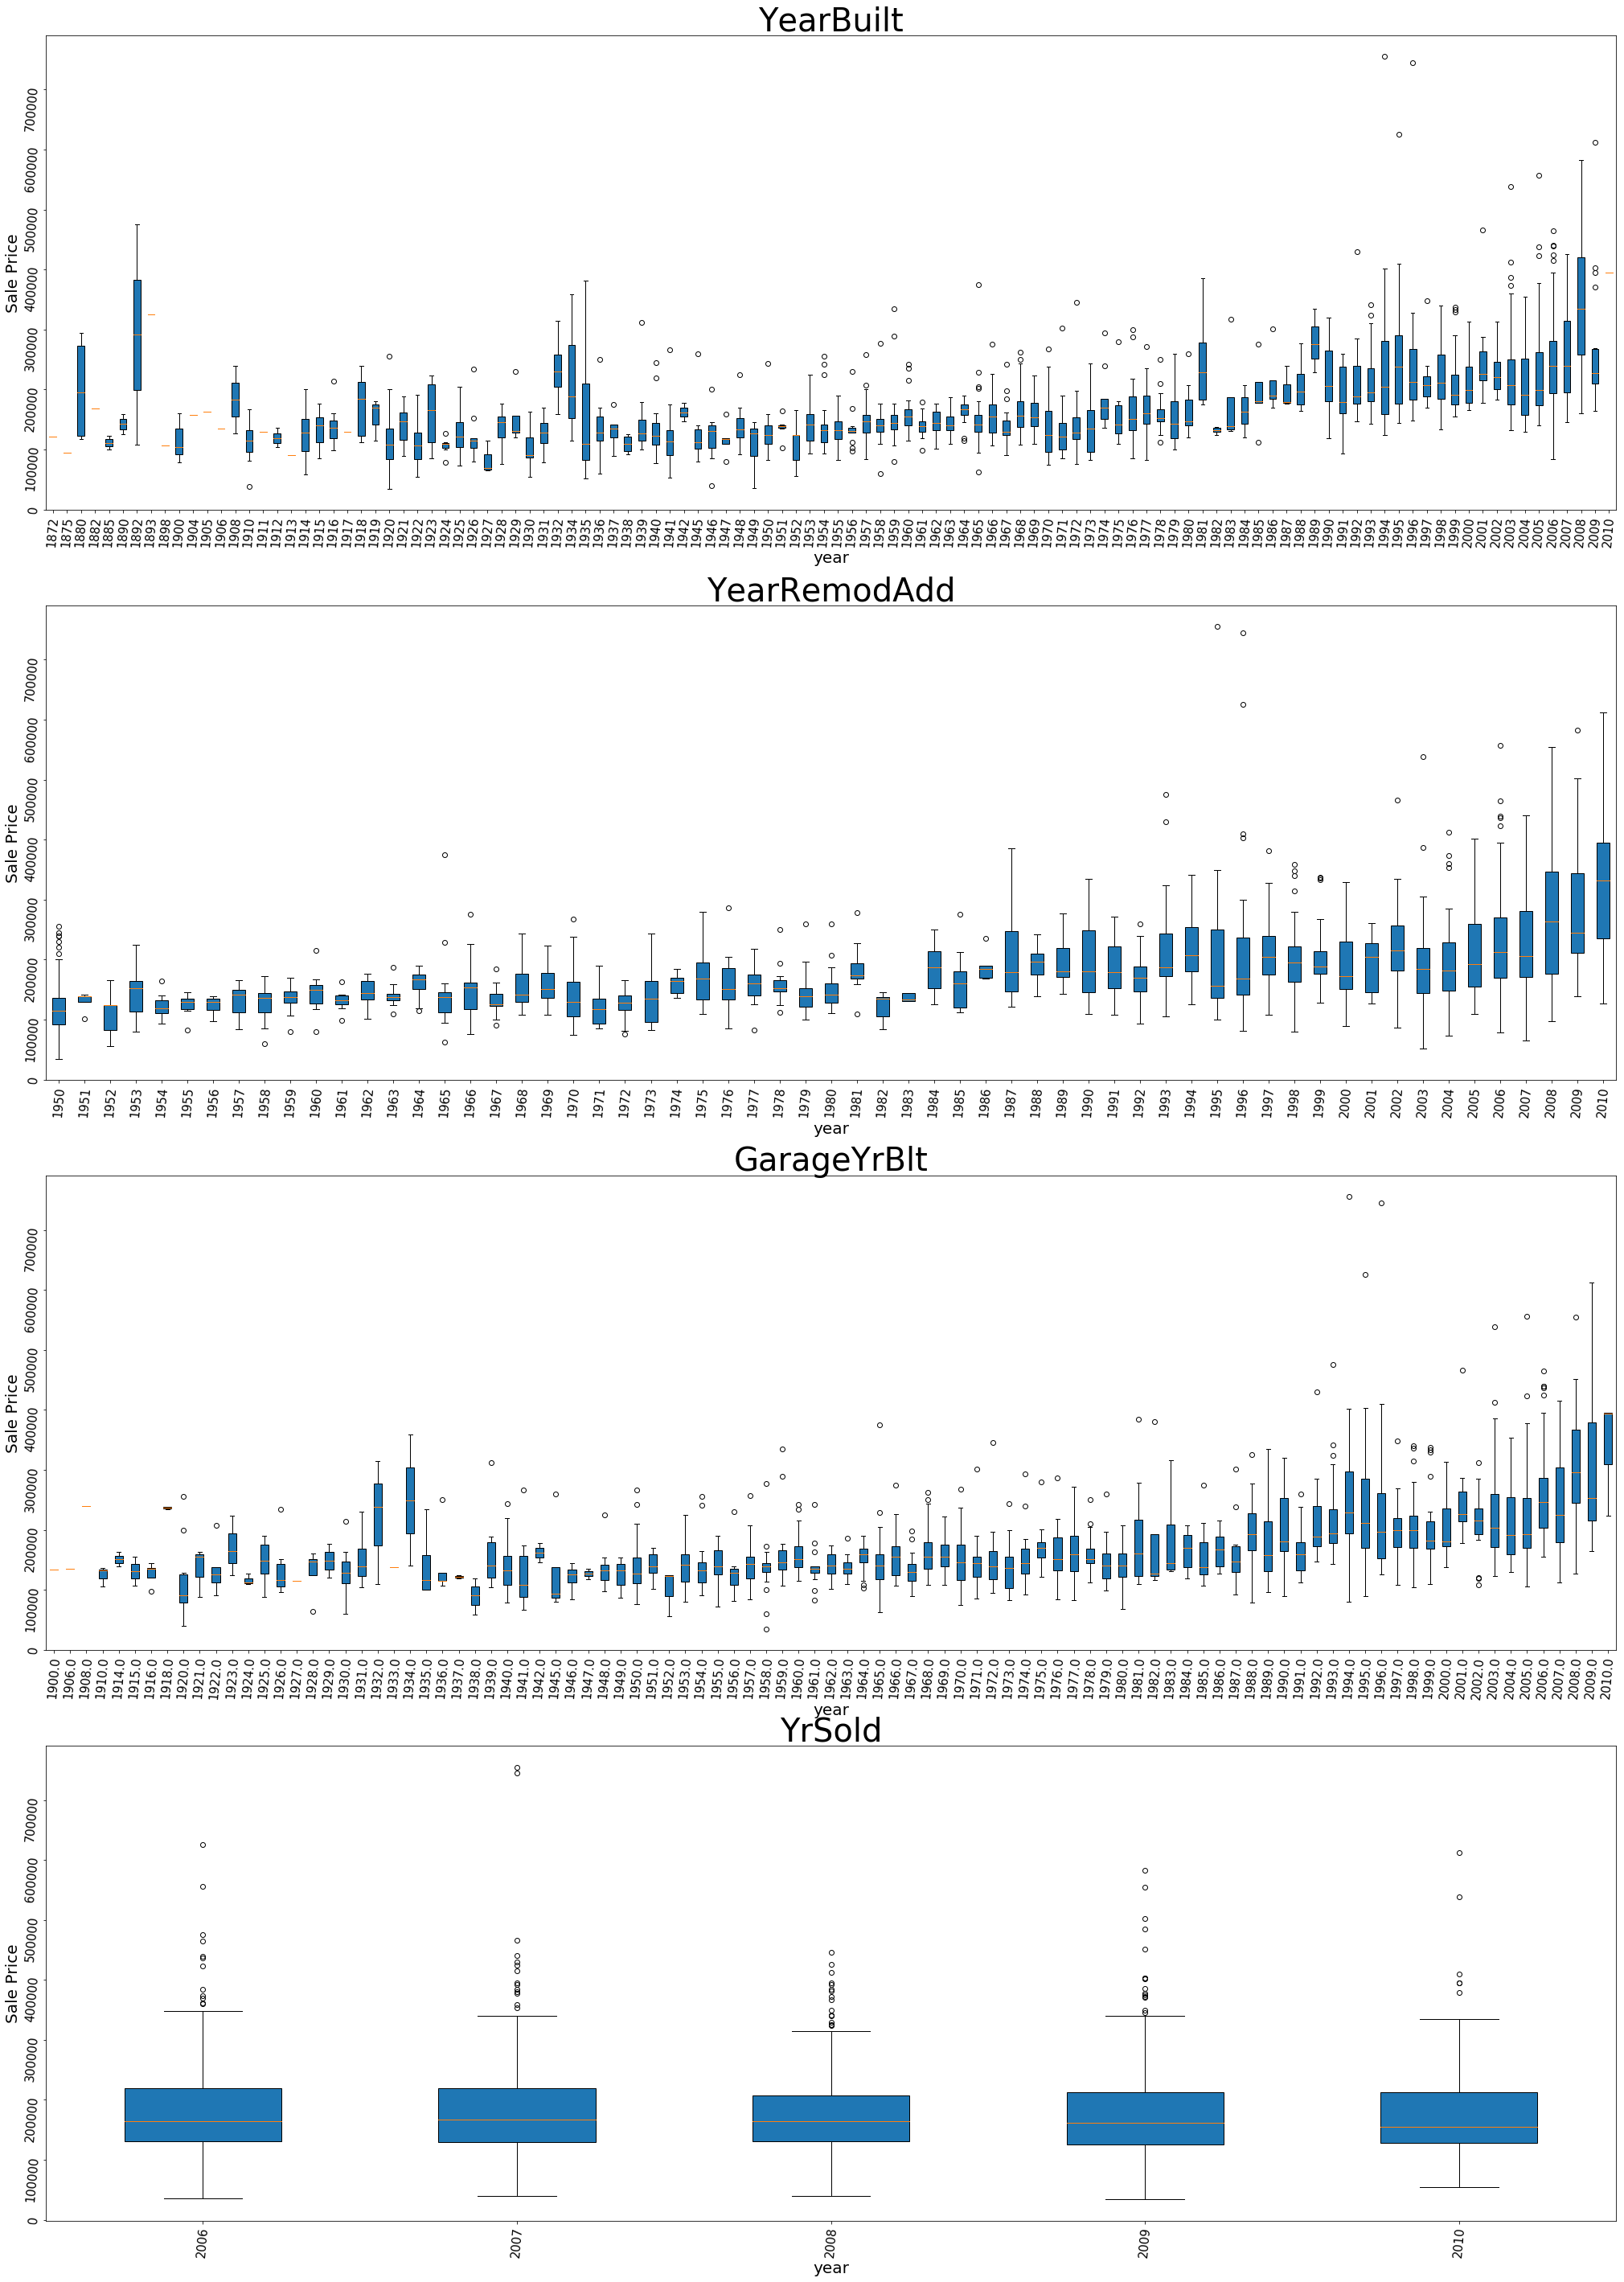

In [21]:
    fig, ax = plt.subplots(4, 1, figsize=(35,50))

for i, feature in enumerate(yr_features):
    data = train_data.groupby(feature)['SalePrice'].apply(list).groupby(level=0).apply(list)
    ax[i].boxplot(data, vert=True, patch_artist=True, labels=data.index)
    ax[i].set_title(feature, fontsize=40)
    ax[i].set_xlabel('year', fontsize=20)
    ax[i].set_ylabel('Sale Price', fontsize=20)
    ax[i].tick_params(labelrotation=85, labelsize = 15)
;

In [22]:
corr_num_yr = train_data[yr_features + ['SalePrice']].corr()['SalePrice'].sort_values()
corr_num_yr

YrSold         -0.028923
GarageYrBlt     0.486362
YearRemodAdd    0.507101
YearBuilt       0.522897
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [23]:
corr_num_yr = corr_num_yr[:-1]
corr_num_yr = corr_num_yr[abs(corr_num_yr) > 0.4]
corr_num_yr

GarageYrBlt     0.486362
YearRemodAdd    0.507101
YearBuilt       0.522897
Name: SalePrice, dtype: float64

#### Overview correlation of the dataset

In [24]:
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
matrix_corr = train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matrix_corr, square=True, cmap='Blues');

In [ ]:
features_top = matrix_corr.nlargest(12, 'SalePrice')['SalePrice'].index
features_top

In [ ]:
import numpy as np

In [ ]:
cm = np.corrcoef(train_data[features_top].values)
cm